In [4]:
!pip install git+https://github.com/APCLab/jieba-tw.git

  Cloning https://github.com/APCLab/jieba-tw.git to c:\users\tibame\appdata\local\temp\pip-req-build-d0y10rkp
  Created wheel for jieba: filename=jieba-0.39.1-py3-none-any.whl size=6669893 sha256=a4ecc88250931367e2118cee31165328fc9d5d03f2ef3d438a6bc3df90991ca5
  Stored in directory: C:\Users\Tibame\AppData\Local\Temp\pip-ephem-wheel-cache-2pcvln2m\wheels\f3\92\35\5e2679360de6fd4c424678c139718c898f0a87ae600458aa76
Successfully built jieba
  Attempting uninstall: jieba
    Found existing installation: jieba 0.42.1
    Uninstalling jieba-0.42.1:
      Successfully uninstalled jieba-0.42.1


  Running command git clone -q https://github.com/APCLab/jieba-tw.git 'C:\Users\Tibame\AppData\Local\Temp\pip-req-build-d0y10rkp'


In [10]:
import jieba,json, re
from jieba import posseg as pseg

In [11]:
#指定辭典檔
jieba.set_dictionary('jieba_data/dict.txt')

In [12]:
#stop word
with open(file='jieba_data/stop_words.txt', mode='r', encoding='utf-8') as file:
    stop_words = file.read().split('\n')

In [13]:
jieba.__version__

'0.39'

<h3>開 TXT 檔用

In [9]:
# text_file = f"{}.txt"
# with open(text_file, 'r') as f:
#     text = f.read()

<h3> 開 JSON 檔用

In [14]:
stock_code = '2454'
json_file = f"{stock_code}.json"
with open(json_file,"r",encoding='utf-8') as f:
    text = json.load(f) 
print(type(text))
print(type(text[0]))
print(len(text))

<class 'list'>
<class 'dict'>
700


In [22]:
data = ''
count = 0
stop_list = ["排行" , "名" , "日程表" , "前" , "統計","權重"]
for i in range(150):
    if not any(x in text[i]["title"] for x in stop_list):
        tmp = text[i]["content"].replace("\n", "")
        data += tmp
        print(text[i]["title"])
        count += 1
print(count)
print(data)

[新聞] 鴻海斥逾10億元 與泰國國家石油成立合資
[新聞] 聯發科大漲 市值再度超車鴻海
[新聞] 外資升評喊加碼台股 11檔潛力股必買
[新聞] 台積電完勝 今年營收看增24％ 英特爾衰退
[新聞] 聯發科6奈米迅鯤900T　強打5G WiFi 6搶進
[新聞] 官股3天倒貨百億元 台積電砍最多
[新聞]蔡明彰觀點：中鋼正在複製聯電模式
[新聞] 花旗力挺喊買聯發科 目標價1,650元
[標的] 2454.TW 聯發科 空
[新聞] 獨家︱聯電員工樂透！今年分紅倍增　全年
[新聞] 股民心聲》28奈米搶手 聯電代工價竟高於
[新聞] 晶圓代工漲不停 IC設計在兩隻大象中求生
[新聞] 台積電傳明年調漲代工價格20％
Re: [新聞] 台積電傳明年調漲代工價格20％
[新聞] 國巨傳降價苦股價 外資續讚送暖
[標的] 2454聯發科 2330台積電 3711日月光 請益
[新聞] 晶片有漲價空間，美系外資續看好聯發科
[標的] 2454.TW 聯發科 大盤破頸追空
[新聞] 聯發科7月營收403.6億元 月減15%
Re: [請益] 投資電話
[新聞] 高通想入股安謀 將不利聯發科
[新聞] 高通有壓 聯發科利多
[新聞] 「搶單一姐」變股市波段女神！400萬本
[新聞] 電子股弱勢 法人：市場對旺季期望過高
[新聞] 台股解析／台股十天跌掉1,140點 法人說這
[新聞] 三外資上修聯發科 最高目標價1,740元
[新聞] 法人：聯發科中長線動能 不墜
[標的]  2454 聯發科 獲利多
Re: [新聞] 聯發科H1獲利年增逾300％ 每股賺33.65元
[新聞] 聯發科H1獲利年增逾300％ 每股賺33.65元
[新聞] 外資：三星DDI產能將外包 驅動三雄受惠大
[新聞] 聯發科、盛群IC設計法說起跑！三利空添
[情報] 下禮拜電子股超級法說會週！
[新聞] 聯發科法說會看旺！大摩喊買、目標價1,28
[新聞] 電子復甦!6月營收寫新高 每3檔就有1間半
[新聞] 台股萬八攻不上 杜金龍：拉盤工具已用盡
[新聞] 聯發科業績旺 寫兩個新高
[情報] 2454 聯發科 6月營收 477.5E
[新聞] 三星退出LCD市場 面板雙虎扮演供應鍊要角
[新聞] 雙蔡喊話 聯發科今年成長強勁
[新聞] 聯發科董座蔡明介：京元電影響第3季恢復 全年營收年增40％以
[

In [ ]:
#建立分詞結果
seg_list = []
for term in jieba.lcut(data):
    if term not in stop_words:
        if len(term) > 1 :
            seg_list.append(term)
print(seg_list)

Building prefix dict from C:\Users\Tibame\Desktop\TFB103\大專題\jupyter_code\jieba_data\dict.txt ...
Loading model from cache C:\Users\Tibame\AppData\Local\Temp\jieba.u2601481e09e04a6c737ffa35c8387617.cache


In [74]:
count_dict = {}
for item in seg_list:
    if item in count_dict.keys():
        count_dict[item] += 1
    else:
        count_dict[item] = 1
# print(count_dict)
sorted(count_dict.items(), key=lambda x:x[1], reverse = True)

[('聯發科', 343),
 ('台積電', 195),
 ('原文', 151),
 ('標題', 144),
 ('時間', 143),
 ('營收', 141),
 ('2021', 131),
 ('20', 128),
 ('10', 127),
 ('台股', 126),
 ('15', 123),
 ('今年', 118),
 ('市場', 113),
 ('手機', 109),
 ('外資', 103),
 ('晶片', 96),
 ('2454', 94),
 ('17', 90),
 ('https', 88),
 ('06', 85),
 ('作者', 82),
 ('看板', 81),
 ('Stock', 81),
 ('新聞', 78),
 ('成長', 78),
 ('股價', 78),
 ('目標價', 77),
 ('晶圓', 73),
 ('高通', 73),
 ('KY', 72),
 ('5G', 71),
 ('台灣', 69),
 ('持續', 68),
 ('com', 67),
 ('需求', 67),
 ('16', 65),
 ('半導體', 65),
 ('聯電', 64),
 ('獲利', 64),
 ('代工', 63),
 ('產能', 62),
 ('市值', 61),
 ('製程', 61),
 ('公司', 60),
 ('心得', 60),
 ('12', 59),
 ('IC', 57),
 ('預期', 56),
 ('發布', 54),
 ('客戶', 52),
 ('去年', 52),
 ('指數', 51),
 ('評論', 49),
 ('長榮', 48),
 ('內容', 46),
 ('表示', 46),
 ('連結', 45),
 ('13', 45),
 ('三星', 45),
 ('22', 45),
 ('價格', 45),
 ('投資', 44),
 ('疫情', 44),
 ('毛利率', 44),
 ('設計', 43),
 ('21', 43),
 ('產業', 42),
 ('可能', 42),
 ('明年', 42),
 ('指出', 42),
 ('影響', 42),
 ('2330', 41),
 ('表現', 40),
 ('目前', 40),
 ('預估

In [76]:
from collections import Counter
seg_counter = Counter(seg_list)
seg_counter

Counter({'作者': 82,
         'qwert1122': 1,
         '板肉': 1,
         '看板': 81,
         'Stock': 81,
         '標題': 144,
         '新聞': 78,
         '鴻海': 31,
         '10': 127,
         '泰國': 13,
         '國家': 7,
         '石油': 15,
         '成立': 3,
         '合資': 5,
         '時間': 143,
         'Tue': 11,
         'Sep': 12,
         '14': 37,
         '19': 25,
         '38': 10,
         '40': 8,
         '2021': 131,
         '原文': 151,
         '公司': 60,
         '請勿': 6,
         '刪減': 7,
         '連結': 45,
         'https': 88,
         'news': 26,
         'cnyes': 4,
         'com': 67,
         'id': 3,
         '4724541': 1,
         '善用': 7,
         '網址': 20,
         '工具': 13,
         '發布': 54,
         '鉅亨網': 7,
         '記者': 34,
         '昱文': 1,
         '台北': 20,
         '09': 24,
         '18': 28,
         '47': 9,
         '請以': 6,
         '網頁': 6,
         '報紙': 6,
         '為準': 7,
         '內容': 46,
         '2317': 19,
         'TW': 28,
         '宣布':

In [79]:
!pip install wordcloud

In [80]:
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
print(matplotlib.matplotlib_fname())

C:\Users\Tibame\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


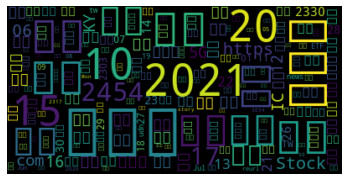

In [82]:
#有處理stop words
wordcloud = WordCloud(font_path='fonts/TaipeiSansTCBeta-Regular.ttf').generate_from_frequencies(seg_counter)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [41]:
# 斷詞結果存檔
segSaveFile = 'jieba_data/segDone.txt'
with open(segSaveFile, 'a') as saveFile:
    for i in range(len(seg_list)):
        words = seg_list[i]
        if len(words) > 1:
            saveFile.write(words)
            saveFile.write('\n')

UnicodeEncodeError: 'cp950' codec can't encode character '\u6ed9' in position 0: illegal multibyte sequence

In [102]:
.encode('utf-8') .encode('utf-8')

SyntaxError: invalid syntax (<ipython-input-102-e429bcdce2ba>, line 1)